<a href="https://colab.research.google.com/github/TJhon/DI-src/blob/main/Clase_1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("librarian")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘BiocManager’




In [35]:
librarian::shelf(
  ggplot2, dplyr, janitor, stringr
)
theme_set(theme_minimal())

In [9]:
datos = read.csv("https://caelum-online-public.s3.amazonaws.com/alura-latam-inmersion-datos/alura_latam-inmersion_datos-arhivos_descarga/inmuebles_bogota.csv") |>
  clean_names()
glimpse(datos)

Rows: 9,520
Columns: 8
$ tipo         <chr> "Apartamento", "Casa", "Apartamento", "Apartamento", "Apa…
$ descripcion  <chr> "Apartamento en venta en Zona Noroccidental", "Casa en ve…
$ habitaciones <int> 3, 4, 3, 3, 2, 1, 1, 3, 3, 2, 2, 3, 2, 3, 4, 3, 3, 2, 2, …
$ banos        <int> 2, 3, 3, 2, 3, 2, 2, 4, 2, 2, 2, 2, 1, 3, 3, 4, 2, 2, 1, …
$ area         <int> 70, 170, 144, 154, 128, 62, 62, 212, 159, 80, 80, 59, 45,…
$ barrio       <chr> "Zona Noroccidental", "Castilla", "Chico Reservado", "Usa…
$ upz          <chr> "CHAPINERO: Pardo Rubio + Chapinero", "KENNEDY: Castilla …
$ valor        <chr> "$ 360.000.000", "$ 670.000.000", "$ 1.120.000.000", "$ 8…


In [18]:
area_promedio = datos |>
  group_by(barrio) |> summarise(area_eval = mean(area)) |> arrange(desc(area_eval)) |> 
  top_n(10)
area_promedio

Selecting by area_eval


barrio,area_eval
<chr>,<dbl>
Modelia,4316.7500
Libertador,642.0000
Bosa Piamonte,400.0000
La Soledad,378.6250
Restrepo,336.5000
Santa Librada,328.0000
Las Ferias,320.0000
Santa Ana,309.3750
Veraguas,302.6667


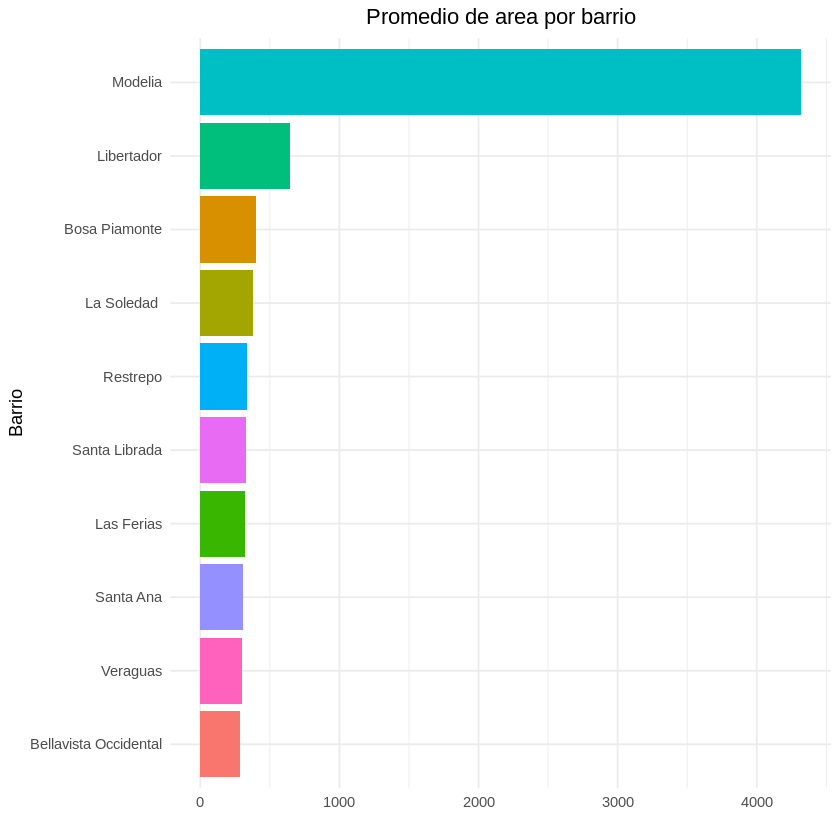

In [34]:
grafico = area_promedio |>
  ggplot() +
  geom_col(aes(x = reorder(barrio, area_eval), area_eval, fill = barrio)) + 
  coord_flip() +
  labs(x = "Barrio", y = "", title = "Promedio de area por barrio") +
  theme(legend.position = "none", plot.title = element_text(hjust = .5))
plot(grafico)

Selecting by area_eval
Selecting by area_eval


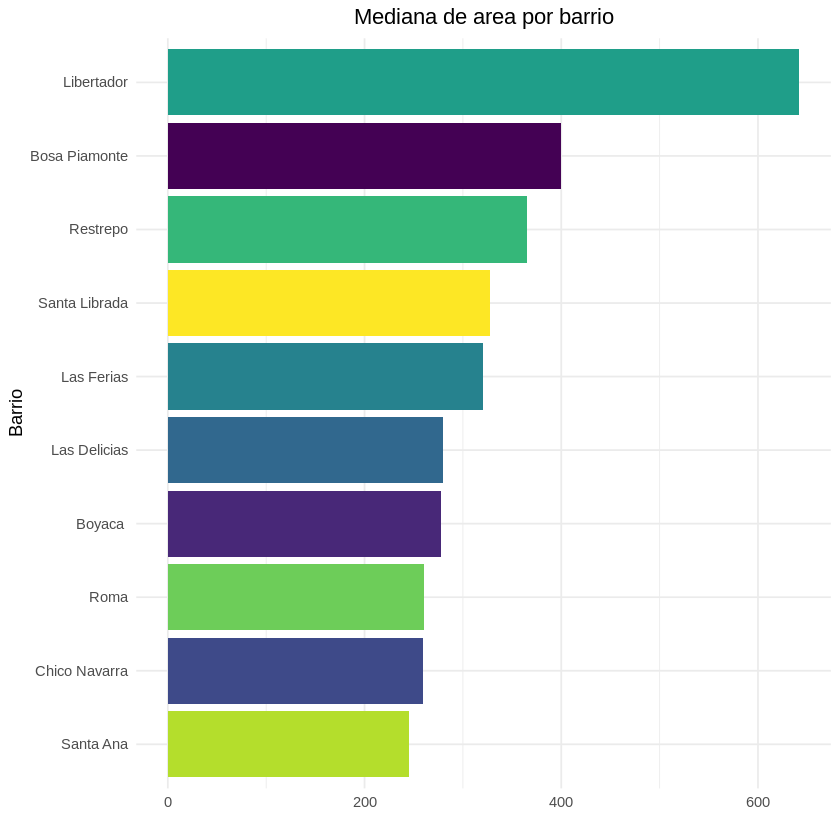

Selecting by area_eval


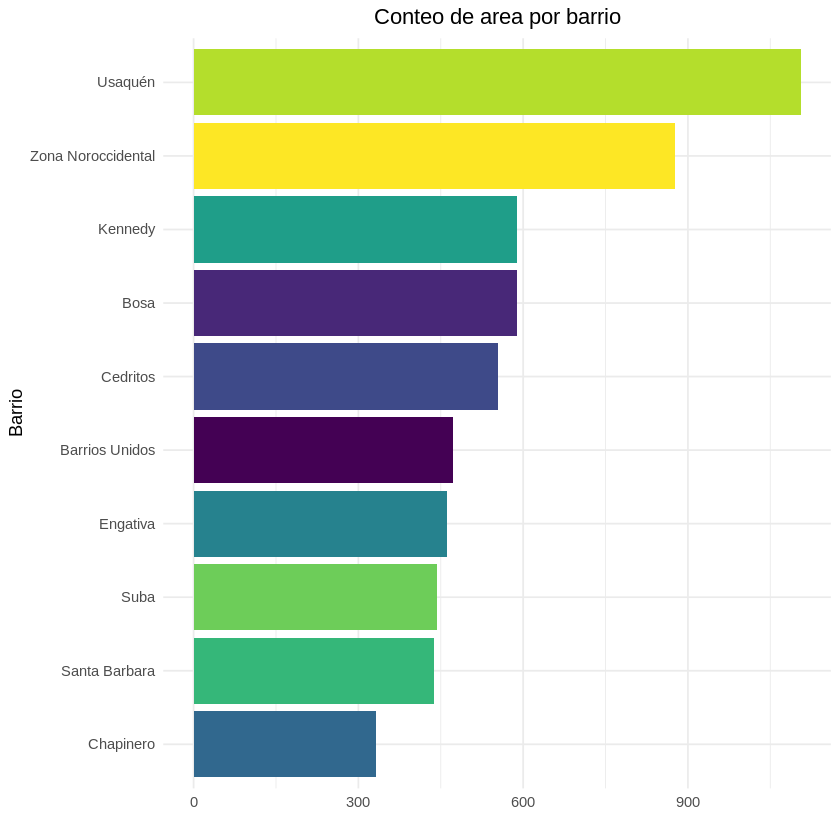

Selecting by area_eval


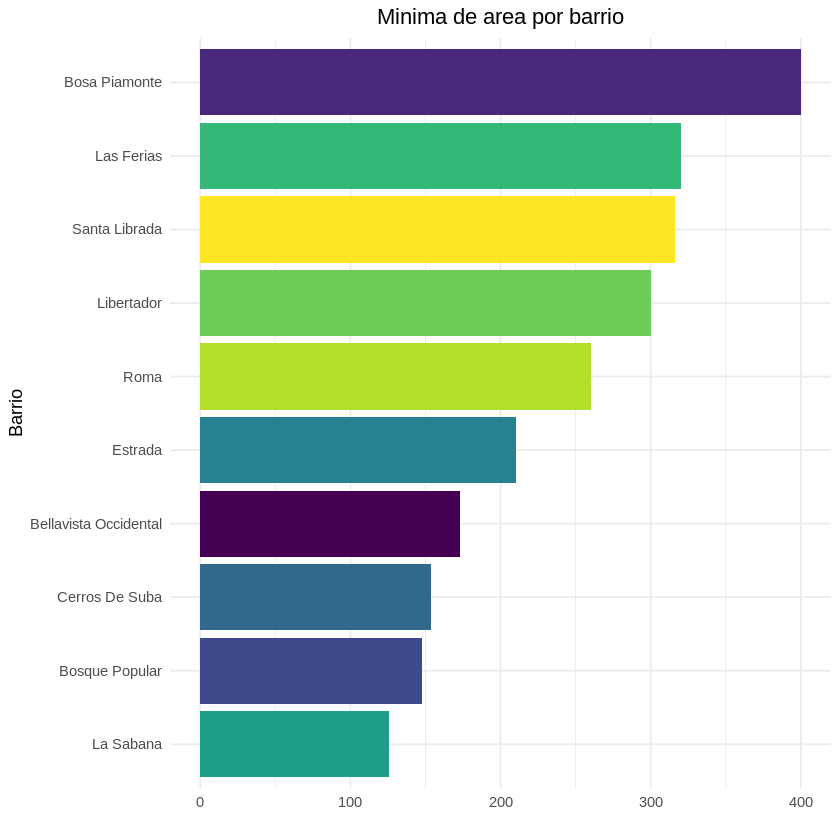

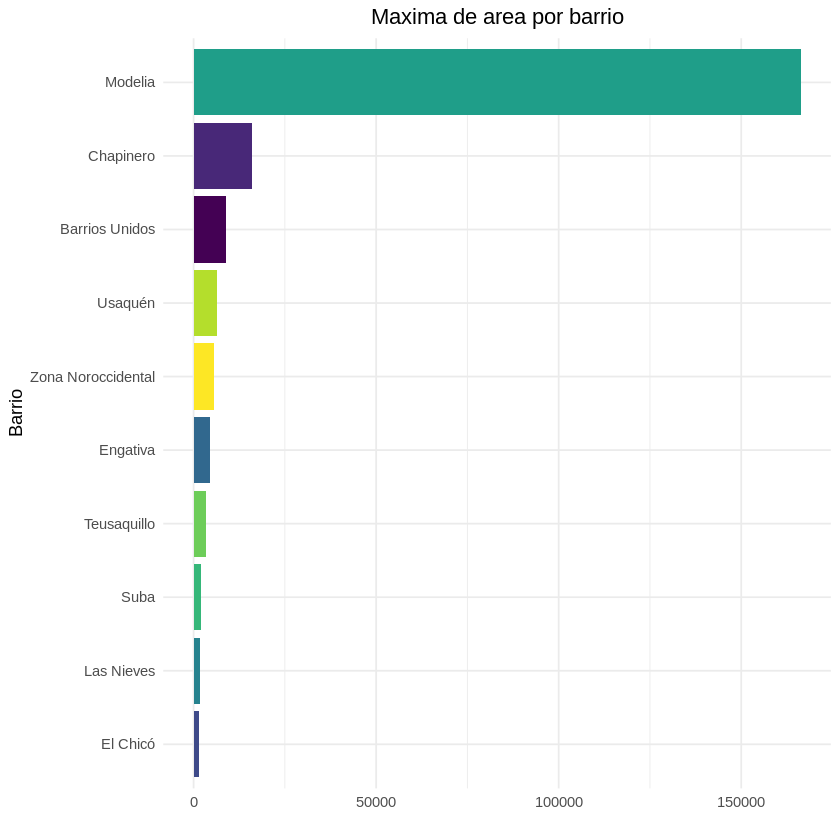

In [42]:


otros_estadisticos = function(estadistico){
  if(estadistico == "mediana"){
    area_promedio = datos |>  group_by(barrio) |> summarise(area_eval = median(area)) |> arrange(desc(area_eval)) |> top_n(10)
  } else if(estadistico == "conteo"){
    area_promedio = datos |>  group_by(barrio) |> summarise(area_eval = n()) |> arrange(desc(area_eval)) |> top_n(10)
  } else if(estadistico == "minima"){
    area_promedio = datos |>  group_by(barrio) |> summarise(area_eval = min(area)) |> arrange(desc(area_eval)) |> top_n(10)
  } else if(estadistico == "maxima"){
    area_promedio = datos |>  group_by(barrio) |> summarise(area_eval = max(area)) |> arrange(desc(area_eval)) |> top_n(10)
  } else {
    stop("Estadistico no valido.")
  }
  grafico = area_promedio |>
    ggplot() +
    geom_col(aes(x = reorder(barrio, area_eval), area_eval, fill = barrio)) + 
    coord_flip() +
    labs(x = "Barrio", y = "", title = paste(str_to_sentence(estadistico), "de area por barrio") ) +
    theme(legend.position = "none", plot.title = element_text(hjust = .5)) +
    scale_fill_viridis_d()
  plot(grafico) 
}

otros_estadisticos("mediana")
otros_estadisticos("conteo")
otros_estadisticos("minima")
otros_estadisticos("maxima")